In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Loading the dagtaset
encodings = ['utf-8','latin1','ISO-8859-1','cp1252']
file_path = "loan_pred.csv"

# Attempt to read the files with Differennt encodings
for en in encodings:
    try:
        df = pd.read_csv(file_path,encoding= en)
        print(f"File Successfully read with encoding: {en}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding {en}")
    
    if 'df' in locals():
        print("CSV have been successfully Loaded")
    else:
        print("All encoding attempts failed.Unable to read the file")

File Successfully read with encoding: utf-8


In [67]:
df.head()
df[df['Property_Area']=='Semi-urban']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semi-urban,Y
71,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semi-urban,Y
87,LP001282,Male,Yes,0,Graduate,No,2500,2118.0,104.0,360.0,1.0,Semi-urban,Y
101,LP001349,Male,No,0,Graduate,No,4843,3806.0,151.0,360.0,1.0,Semi-urban,Y
449,LP002444,Male,No,1,Not Graduate,Yes,2769,1542.0,190.0,360.0,NaN,Semi-urban,N
454,LP002453,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semi-urban,Y


In [68]:
# df[df['Property_Area'] != ('Semiurban' or 'semiurban' or 'Semi-urban' or 'Urban' or 'Rural')]

In [69]:
# Describing the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [70]:
# Checking for the features 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [71]:
df.drop(['Loan_ID','Dependents'],axis=1,inplace=True)

In [72]:
#Checking the null value
df.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
# Dealing with the null value --categorical value

cols = df[['Gender','Married','Self_Employed']]

for i in cols:
    df[i].fillna(df[i].mode().iloc[0],inplace=True)


In [74]:
# Dealing with the null values --numerical 
num_cols = df[['LoanAmount','Loan_Amount_Term','Credit_History']]

for i in num_cols:
    df[i].fillna(df[i].mean(axis=0),inplace=True)

In [75]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
# Visulization 
def chart(graph,col_name):
    approve = df[df['Loan_Status']=='Y'][col_name].value_counts()
    disaprove = df[df['Loan_Status']=='N'][col_name].value_counts()

    plt_df = pd.DataFrame([approve,disaprove])
    plt_df.index = ["Approve","Disapprove"]
    plt_df.plot(kind=graph)

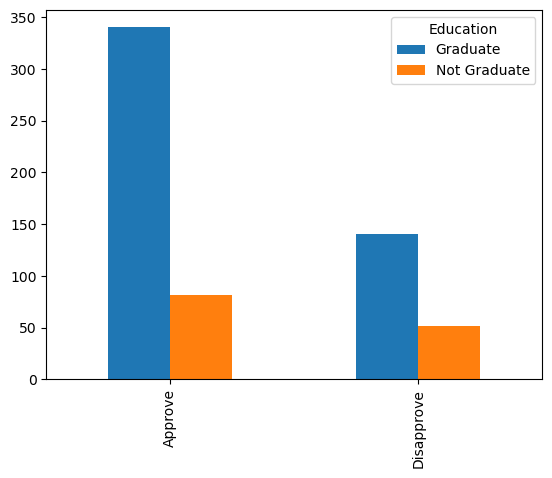

In [77]:
chart('bar','Education')

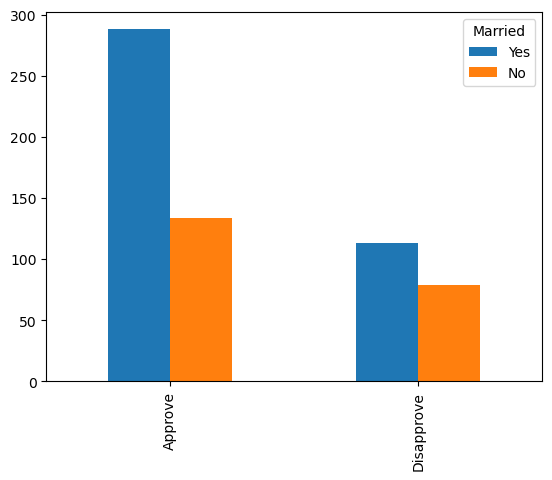

In [78]:
chart('bar','Married')

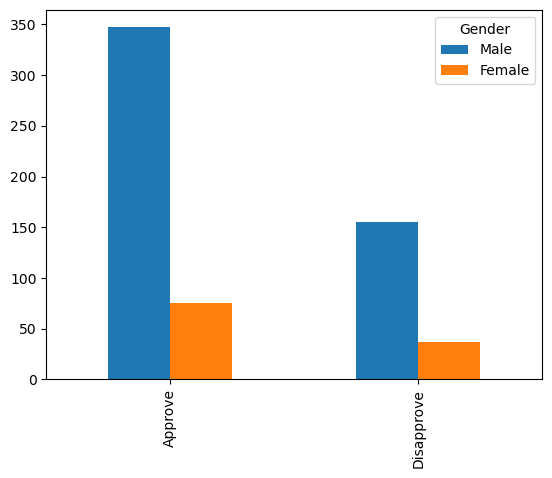

In [79]:
chart('bar','Gender')

In [80]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'semiurban':1,'Semi-urban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<Axes: >

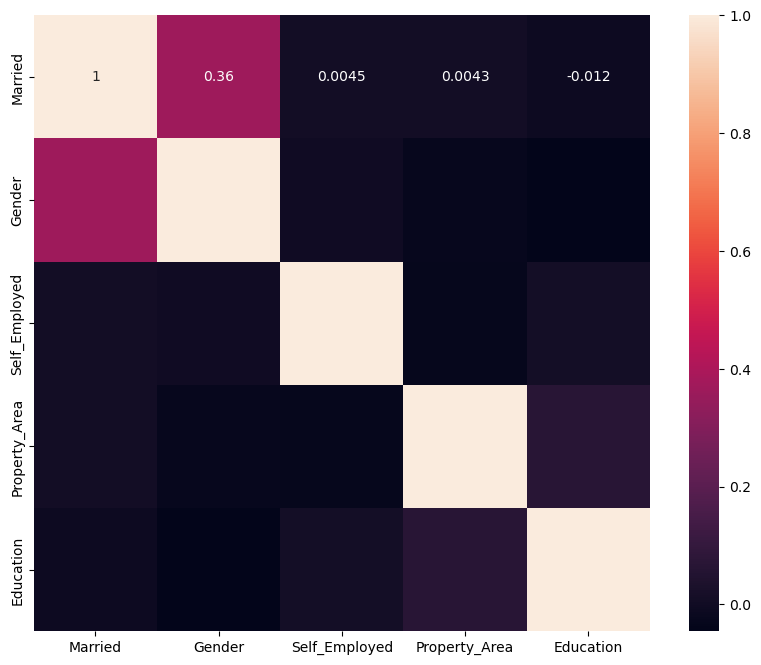

In [81]:
# Heat map
cor = df[['Married', 'Gender', 'Self_Employed', 'Property_Area', 'Education']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,square=8)

In [114]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [83]:
# Spliting the training and testing data
Y = df['Loan_Status']
X = df.drop(columns=['Loan_Status'],axis=1)

In [84]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,2


In [85]:
Y.replace({'Y':1,'N':0},inplace=True)
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=0,stratify=Y)


In [87]:
X.shape, X_train.shape, X_test.shape

((614, 10), (368, 10), (246, 10))

In [88]:
# Training the Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
svc = SVC(kernel='linear')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,random_state=2)
xgb = XGBClassifier(n_estimators=100,random_state=2)


clfs = {
    'svc':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'RF':rfc,
    'ETC':etc,
    'xgb':xgb}


In [90]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

def train_classifier(clf, X_train, y_train, X_test, y_test):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        try:
            precision = precision_score(y_test, y_pred, average='weighted')
        except UndefinedMetricWarning:
            precision = 0.0 
        try:
            recall = recall_score(y_test, y_pred)
        except UndefinedMetricWarning:
            recall = 0.0
            
    return accuracy, precision, recall


In [91]:
for name, clf in clfs.items():
    current_accuracy, current_precision,current_recall = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    print("For", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    print("Recall",current_recall)
    print()

For svc
Accuracy 0.8252032520325203
Precision 0.8539069557362241
Recall 0.9940828402366864

For KN
Accuracy 0.6382113821138211
Precision 0.5899888410648811
Recall 0.8402366863905325

For NB
Accuracy 0.5772357723577236
Precision 0.5947329315130981
Recall 0.6568047337278107

For DT
Accuracy 0.6910569105691057
Precision 0.6978679344040836
Recall 0.757396449704142

For RF
Accuracy 0.8130081300813008
Precision 0.8094155705954966
Recall 0.9289940828402367

For ETC
Accuracy 0.7520325203252033
Precision 0.7440379403794039
Recall 0.8520710059171598

For xgb
Accuracy 0.7804878048780488
Precision 0.7729945059013431
Recall 0.8816568047337278



+ As we have received the accuracy and precession and recall scores for different trained models
 Now to make it more efficient and accurate.
+ I am palnning to use voting classifiers that will combine more than 1 model that is having good accuracy and prcession and recall value

In [92]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('SVC',svc),('RF',rfc),('ETC',etc),('XGB',xgb)])


In [93]:
# Trainig the data

voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('SVC', SVC(kernel='linear')),
                             ('RF', RandomForestClassifier(random_state=2)),
                             ('ETC', ExtraTreesClassifier(random_state=2)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=2, ...))])

In [97]:
Y_pred = voting.predict(X_test)

print("Accuracy Score :",accuracy_score(Y_test,Y_pred))
print("Precision Score :",precision_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy Score : 0.8048780487804879
Precision Score : 0.8201058201058201
[[ 43  34]
 [ 14 155]]


# Selecting the Model 


In [95]:
model = svc.fit(X_train,Y_train)
y_pred1 = svc.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))


0.8252032520325203
[[ 35  42]
 [  1 168]]
0.8


In [96]:
model.predict([[1,0,1,0,5849,0.0,146.412162,360.0,1.0,2]])
	

c:\Users\supra\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Saving a model using pickle in python

In [106]:
import pickle
with open('s_model.pkl', 'wb') as file:
    pickle.dump(svc, file)


#                                       Conclutions Based On The DataSet

- The dataset contains information about loans, including applicant details, loan amount, approval status, aplicant's income,tenure,Properities.
- There were missing values in some columns like 'Credit_History' and 'Self_Employed', which were handled by different methods like using (mean,median,mode).
- Then the important features were selected that makes them unbaised and good fit for the model to be trained
- Most applicants are married, male, and graduates.
- Loan approval status shows a slight imbalance, with more approved loans than denied ones.
- Features like 'ApplicantIncome', 'LoanAmount', and 'Loan_Amount_Term' show variability and may require further analysis but the accuracy,precession and recall scores were comparatively good and based on this the model was selected.
- There is a positive correlation between 'ApplicantIncome' and 'LoanAmount', which is expected.

#                                               Added Features 
+ The model was loaded using pickle
+ It is used to create an app and that app is deployed in the streamlit



These are most of the required conclutions that i have presented.

Thank You!
